<a href="https://colab.research.google.com/github/faragodian/OP_CLASSIFICACION_AML/blob/main/OP_CLASSIF_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Ejercicio de Aplicación # 1:
Clasificación de la Leucemia Mieloide Aguda (AML, Acute Myeloid Leukemia)
en el contexto del cáncer hematológico.

Julio 25, 2025
Examen preliminar antes de la clasificación
Pedir explicacion a Oscar
"""

# Resultados de exámenes (simulados)
cariotipo = "normal"
NGS = {"NPM1": "wildtype", "FLT3": "ITD_positivo"}

# Reglas de decisión
if cariotipo in ["t(8;21)", "inv(16)", "t(15;17)"]:
    AGR = "si"
elif "NPM1_mutado" in NGS.values() or "CEBPA_mutado" in NGS.values():
    AGR = "si"
else:
    AGR = "no"

print(f"¿AGR?: {AGR.upper()}")  # Output: ¿AGR?: NO (porque FLT3-ITD no es AGR definitoria)

¿AGR?: NO


In [ ]:
"""
Ejercicio de Aplicación # 1:
Clasificación de la Leucemia Mieloide Aguda (AML, Acute Myeloid Leukemia)
en el contexto del cáncer hematológico.

Julio 25, 2025
"""
# 1. Definicion ANOMALIAS GENETICAS RECURRENTES (AGR) y preguntar si presenta o no AGR
while True:  # Bucle infinito hasta que se ingrese "si" o "no"
    print('¿El paciente presenta anomalías genéticas recurrentes? Responda "si" o "no":')
    # AGR = input().strip().lower()  # METODO .strip() Elimina espacios .lower() Convierte a minúsculas
    AGR = input().replace(" ", "").lower()  # METODO .replace() .lower() reemplaza y convierte a minúsculas

    if AGR in ["si", "no"]:  # Verifica si la respuesta es válida
        break  # Sale del bucle si es válida
    else:
        print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***\n')

# Clasificación basada en la respuesta válida
if AGR == "si":
    print(f'\nEl paciente ({AGR.upper()}) presenta AML con AGR y requiere tratamiento inmediato.') # METODO .upper() convierte a mayúsculas
else:
    print("\nNo se detectaron anomalías genéticas recurrentes y continuamos la indagación.") # \n salta la linea


¿El paciente presenta anomalías genéticas recurrentes? Responda "si" o "no":
no

No se detectaron anomalías genéticas recurrentes y continuamos la indagación.


In [ ]:
# 2. Si no hubo AGR se analizarán otras alteraciones.
"""
# Primera alteracion: mutacion del TP53
# TP53 =  Es un gen supresor de tumores ubicado en el cromosoma 17p13.
# Su proteína (p53) regula: la reparacion del ADN, la apoptosis (muerte celular programada) y
# el ciclo celular que regula la proliferacion descontrolada
# VAF = Frecuencia Alélica de la Variante
# VAF ≥10% significa que ≥10% de las copias de TP53 están mutadas. Indica mayor carga mutacional y
# peor pronóstico. Si VAF < 10 podria ser una mutación secundaria.
"""

# 2 a. Definicion de Mutated TP53 VAF
print('¿El ratio de la VAF es mayor o igual a 10%?')
MUT_TP53_VAF = input().replace(" ", "").lower()
if MUT_TP53_VAF == "si":
 print("El paciente tiene una AML asociada a mutación de TP53")
else:
  print ("¿Tiene alteraciones moleculares asociadas a mielodiesplasia?")
MDS_MOL = input().replace(" ", "").lower()
if MDS_MOL == "si":
  print("El paciente tiene una AML asociada a alteraciones moleculares asociadas a displasia")
else:
  print ("¿Tiene alteraciones citogenéticas asociadas a mielodiesplasia?")

# # 2 b. Definicion del porcentaje de blastos

# print(f'El VAF del TP53 mutado es del {MUT_TP53_VAF}%')
# if MUT_TP53_VAF >= 10:
#   print('¿Cuál es el porcentaje de blastos en médula?')
#   BLASTOS = int(input())
#   print(f'El porcentaje de blastos es {BLASTOS}%')
#   if BLASTOS >= 20:
#     print(f'El porcentaje de blastos es {BLASTOS}%. Por tanto, el paciente tiene el AML con TP53 mutado y requiere tratamiento inmediato')
#   else:
#     print(f'El porcentaje de blastos es {BLASTOS}%. Por tanto, el ADS/AML con TP53 mutado')


¿El ratio de la VAF es mayor o igual a 10%?
10
¿Tiene alteraciones moleculares asociadas a mielodiesplasia?
si
El paciente tiene una AML asociada a alteraciones moleculares asociadas a displasia


**Hierarchical Classification of the International Consensus Classification of AML**

![AML Classification](/content/drive/MyDrive/PYTHON_COURSE/AML_CLASSIFICATION/AML_CLASSIF.png)

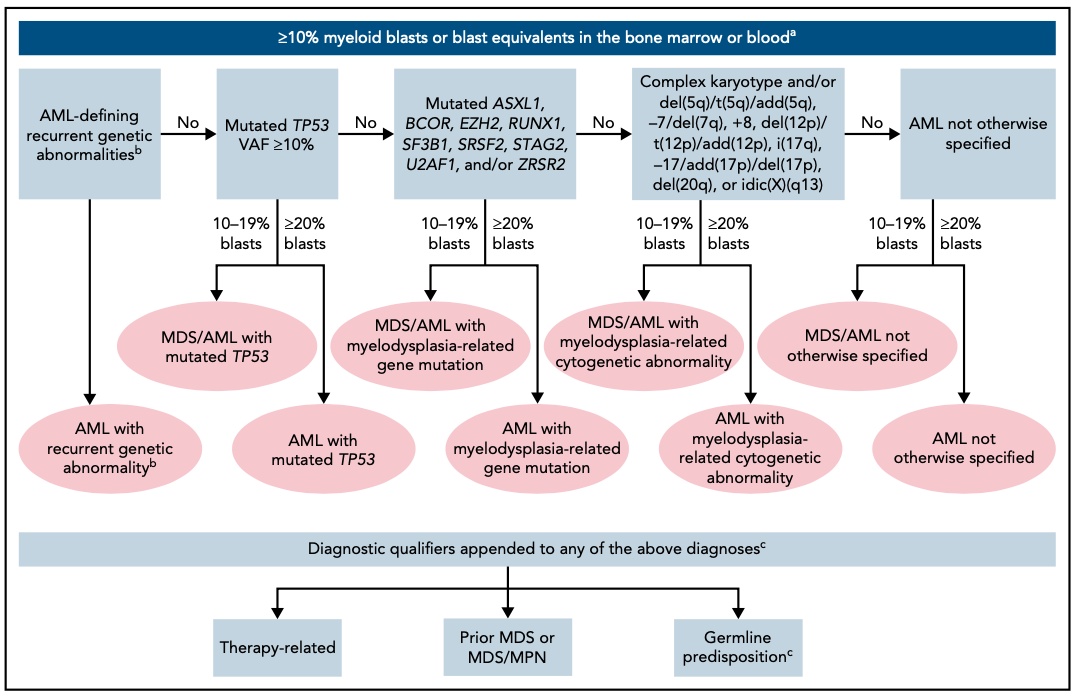

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/PYTHON_COURSE/AML_CLASSIFICATION/AML_CLASSIF.png')

In [ ]:
"""
Domingo 27 de Julio, 2025
Update: Lunes 28
Este script implementa la clasificación jerárquica de la Leucemia Mieloide Aguda (AML)
basada en el Consenso Internacional de Clasificación (ICC) establecida en DOHNER.pdf.
Este script se debe REVISAR y fue hecho por JR con ayuda de la IA.
Nota para Oscar: Todos los comandos presentes en este script ya los hemos estudiado.
Por lo tanto, creo que PODEMOS ENTENDERLOS TODOS
"""

print("--- Clasificación Jerárquica de AML según el Consenso Internacional ---")

# Variables para almacenar el diagnóstico principal y el porcentaje de blastos
primary_diagnosis_category = ""
blast_percentage = 0
diagnostic_qualifiers = []

# Definición del umbral de blastos del 10% siguiendola sugerencia de Oscar.
while True:
    print('\n¿Cuál es el porcentaje de blastos mieloides en la médula ósea? (Ingrese un número entero. Debe ser >= 10% para la clasificación de AML/MDS):')
    try:
        blast_percentage = int(input().strip())
        if blast_percentage >= 10:
            print(f'Porcentaje de blastos ingresado: {blast_percentage}%. Continuamos con la clasificación.')
            break
        else:
            print('*** El porcentaje de blastos debe ser al menos 10% para diagnosticar AML/MDS según esta clasificación. Fin de la indagación. ***')
            exit() # Termina el script si no cumple el criterio inicial de blastos
    except ValueError:
        print('*** Por favor ingrese un número entero válido. ***') # Ojo a este paso

# 1. Definición de Anomalías Genéticas Recurrentes (AGR) (Primer rectángulo)
# Las AML con anomalías genéticas recurrentes tienen la máxima prioridad en la clasificación jerárquica.
if primary_diagnosis_category == "": # Procede solo si el diagnóstico principal aún no está determinado
    while True:
        print('\n¿El paciente presenta anomalías genéticas recurrentes (AGR)? Responda "si" o "no":')
        # Estas anomalías son definitorias de AML.
        AGR_input = input().replace(" ", "").lower()
        if AGR_input in ["si", "no"]:
            break
        else:
            print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***')

    if AGR_input == "si":
        # Para la mayoría de las AGR, >=10% de blastos es diagnóstico de AML.
        # Sin embargo, la figura 1 y la tabla 1 muestran diferenciación 10-19% y >=20%.
        # Se verifica el porcentaje de blastos para diferenciar entre AML y MDS/AML.
        if blast_percentage >= 20:
            primary_diagnosis_category = "AML con anomalías genéticas recurrentes"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
        else: # 10-19% blastos
            primary_diagnosis_category = "MDS/AML con anomalías genéticas recurrentes"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
        print(f'Y requiere tratamiento inmediato.') # Línea del ejemplo proporcionado
    else: # AGR_input == "no"
        print("\nNo se detectaron anomalías genéticas recurrentes, continuamos la indagación.")

# 2. Mutación de TP53 (Segundo rectángulo)
# AML con TP53 mutado tiene la segunda prioridad en la jerarquía.
if primary_diagnosis_category == "":
    while True:
        print('\n¿El paciente presenta mutación en TP53 (patogénica con VAF >=10%)? Responda "si" o "no":')
        # La presencia de una mutación patogénica de TP53 (con VAF >=10%) define esta nueva entidad.
        TP53_mutation_input = input().replace(" ", "").lower()
        if TP53_mutation_input in ["si", "no"]:
            break
        else:
            print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***')

    if TP53_mutation_input == "si":
        if blast_percentage >= 20:
            primary_diagnosis_category = "AML con TP53 mutado"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
        else: # 10-19% blastos
            primary_diagnosis_category = "MDS/AML con TP53 mutado"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
    else: # TP53_mutation_input == "no"
        print("\nNo se detectó mutación en TP53, continuamos la indagación.")

# 3. Mutaciones en genes relacionados con mielodisplasia (Tercer rectángulo)
# Este grupo de mutaciones tiene prioridad sobre las anormalidades citogenéticas relacionadas con mielodisplasia.
if primary_diagnosis_category == "":
    while True:
        print('\n¿El paciente presenta mutaciones en genes relacionados con mielodisplasia (ASXL1, BCOR, EZH2, RUNX1, SF3B1, SRSF2, STAG2, U2AF1, y/o ZRSR2)? Responda "si" o "no":')
        # Estas mutaciones están altamente asociadas con AML después de MDS previo o MDS/MPN y confieren un pronóstico adverso.
        MDS_gene_mutation_input = input().replace(" ", "").lower()
        if MDS_gene_mutation_input in ["si", "no"]:
            break
        else:
            print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***')

    if MDS_gene_mutation_input == "si":
        if blast_percentage >= 20:
            primary_diagnosis_category = "AML con mutaciones en genes relacionados con mielodisplasia"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
        else: # 10-19% blastos
            primary_diagnosis_category = "MDS/AML con mutaciones en genes relacionados con mielodisplasia"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
    else: # MDS_gene_mutation_input == "no"
        print("\nNo se detectaron mutaciones en genes relacionados con mielodisplasia, continuamos la indagación.")

# 4. Anormalidades citogenéticas relacionadas con mielodisplasia (Cuarto rectángulo)
# Estas incluyen casos previamente clasificados como AML-MRC.
if primary_diagnosis_category == "":
    while True:
        print('\n¿El paciente presenta anormalidades citogenéticas relacionadas con mielodisplasia (cariotipo complejo, del(5q)/t(5q)/add(5q), –7/del(7q), +8, del(12p)/t(12p)/add(12p), i(17q), –17/add(17p)/del(17p), del(20q), o idic(X)(q13))? Responda "si" o "no":')
        # Son hallazgos citogenéticos asociados a mielodisplasia.
        MDS_cytogenetic_abnormality_input = input().replace(" ", "").lower()
        if MDS_cytogenetic_abnormality_input in ["si", "no"]:
            break
        else:
            print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***')

    if MDS_cytogenetic_abnormality_input == "si":
        if blast_percentage >= 20:
            primary_diagnosis_category = "AML con anormalidades citogenéticas relacionadas con mielodisplasia"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
        else: # 10-19% blastos
            primary_diagnosis_category = "MDS/AML con anormalidades citogenéticas relacionadas con mielodisplasia"
            print(f'\nEl paciente presenta {primary_diagnosis_category}.')
    else: # MDS_cytogenetic_abnormality_input == "no"
        print("\nNo se detectaron anormalidades citogenéticas relacionadas con mielodisplasia, continuamos la indagación.")

# 5. AML no especificado de otra manera (NOS) (Quinto rectángulo)
# Si no se clasificó en ninguna de las categorías anteriores, es "no especificado de otra manera".
if primary_diagnosis_category == "":
    if blast_percentage >= 20:
        primary_diagnosis_category = "AML no especificado de otra manera"
        print(f'\nEl paciente presenta {primary_diagnosis_category}.')
    else: # 10-19% blastos
        primary_diagnosis_category = "MDS/AML no especificado de otra manera"
        print(f'\nEl paciente presenta {primary_diagnosis_category}.')

# 6. Cualificadores Diagnósticos
# Estos cualificadores se añaden a cualquier diagnóstico principal.

print("\n--- Cualificadores Diagnósticos (Información adicional para la clasificación) ---")

while True:
    print('\n¿El paciente tiene antecedentes de "Terapia-relacionada"? Responda "si" o "no":')
    # "Terapia-relacionada" es ahora un cualificador, no una entidad de enfermedad.
    therapy_related_input = input().replace(" ", "").lower()
    if therapy_related_input in ["si", "no"]:
        if therapy_related_input == "si":
            diagnostic_qualifiers.append("Terapia-relacionada")
        break
    else:
        print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***')

while True:
    print('\n¿El paciente tiene antecedentes de "Mielodisplasia (MDS)" o "MDS/Neoplasia Mieloproliferativa (MPN)"? Responda "si" o "no":')
    # Un historial previo de MDS o MDS/MPN es un cualificador diagnóstico.
    prior_mds_mpn_input = input().replace(" ", "").lower()
    if prior_mds_mpn_input in ["si", "no"]:
        if prior_mds_mpn_input == "si":
            diagnostic_qualifiers.append("Antecedentes de MDS o MDS/MPN")
        break
    else:
        print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***')

while True:
    print('\n¿El paciente tiene una "Predisposición Germinal" a AML? Responda "si" o "no":')
    # La predisposición germinal se aplica como cualificador diagnóstico.
    germline_predisposition_input = input().replace(" ", "").lower()
    if germline_predisposition_input in ["si", "no"]:
        if germline_predisposition_input == "si":
            diagnostic_qualifiers.append("Predisposición Germinal")
        break
    else:
        print('*** Por favor escriba solo "si" o "no". No utilice tildes. ***')

print("\n--- Resumen del Diagnóstico ---")

if primary_diagnosis_category:
    print(f"\nEl diagnóstico principal del paciente es: {primary_diagnosis_category}.")
    if diagnostic_qualifiers:
        print("\nCualificadores diagnósticos adicionales:")
        for qualifier in diagnostic_qualifiers:
            print(f"- {qualifier}")
    else:
        print("\nNo se identificaron cualificadores diagnósticos adicionales.")
else:
    # Este caso solo debería ocurrir si el script termina debido a blastos iniciales < 10%
    print("\nNo se pudo establecer un diagnóstico principal de AML/MDS con los datos proporcionados.")

print("\n--- Fin de la Clasificación ---")


--- Clasificación Jerárquica de AML según el Consenso Internacional ---

¿Cuál es el porcentaje de blastos mieloides en la médula ósea? (Ingrese un número entero. Debe ser >= 10% para la clasificación de AML/MDS):
5
*** El porcentaje de blastos debe ser al menos 10% para diagnosticar AML/MDS según esta clasificación. Fin de la indagación. ***

¿Cuál es el porcentaje de blastos mieloides en la médula ósea? (Ingrese un número entero. Debe ser >= 10% para la clasificación de AML/MDS):
5
*** El porcentaje de blastos debe ser al menos 10% para diagnosticar AML/MDS según esta clasificación. Fin de la indagación. ***

¿Cuál es el porcentaje de blastos mieloides en la médula ósea? (Ingrese un número entero. Debe ser >= 10% para la clasificación de AML/MDS):
6
*** El porcentaje de blastos debe ser al menos 10% para diagnosticar AML/MDS según esta clasificación. Fin de la indagación. ***

¿Cuál es el porcentaje de blastos mieloides en la médula ósea? (Ingrese un número entero. Debe ser >= 10% pa

In [7]:
"""
Lunes, 28 de julio de 2025

SEGUNDA FASE: Invocar la clasificación de AML desde un computador y mostrar los resultados en pantalla
A partir de esta celda, se describen scripts que utilizan comandos nuevos en relación con lo aprendido
hasta ahora. Nota: Los scripts aún no están completos ni han sido probados.

Objetivo de la segunda fase
1. Guardar en GitHub la clasificación de AML realizada.
2. Crear una página web en GitHub donde se implementen comandos en HTML, PHP u otro lenguaje, que permitan:
   - Ejecutar el archivo en Google Colab.
   - Obtener en línea los resultados de la clasificación de AML según los datos ingresados.

Paso 1: Montar Google Drive
"""

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
"""
Lunes, 28 de julio de 2025

Streamlit es una biblioteca de Python que permite crear aplicaciones web interactivas
de manera sencilla y rápida, especialmente para visualizar datos.
Su principal propósito es facilitar la creación de interfaces gráficas (GUIs) sin necesidad de
conocimientos avanzados en desarrollo web (HTML, CSS, JavaScript, etc.).

Paso 2: Instalar streamlit
Esta instalacion es temporal. Es decir, si sale y entra en otro momento ya no estará.
"""
!pip install streamlit

In [ ]:
"""
Lunes, 28 de julio de 2025

Un archivo app.py se crea en proyectos de Python para servir como el archivo
principal de una aplicación, especialmente en el contexto de desarrollo web o
aplicaciones con interfaces gráficas.

Paso 3: Crear el archivo app.py en Colab
Verifique que el archivo app.py quedo en su lugar: /content/app.py
"""
# WARNING! El comando: %%writefile /content/app.py debe estar solo en una celda

In [16]:
%%writefile /content/drive/MyDrive/app.py
import streamlit as st

st.title("Clasificación de AML")
st.write("¡Bienvenido! Esta es una aplicación de prueba.")

Writing /content/drive/MyDrive/app.py


In [17]:
"""
Lunes, 28 de julio de 2025
Paso 4: Verificar que hay dentro delarchivo app.py
Verificar el contenido de: /content/app.py
"""
!cat /content/drive/MyDrive/app.py

import streamlit as st

st.title("Clasificación de AML")
st.write("¡Bienvenido! Esta es una aplicación de prueba.")


In [ ]:
"""
Lunes, 28 de julio 2025
Paso 5: Adaptar el script de clasificación de AML para Streamlit
ADAPTACION HECHA COMPLETAMENTE POR GROK. No sé nada de esto.
WARNING: Para usar el comando magico %%writefile no puede tener comentarios al inicio
"""

In [20]:
%%writefile /content/drive/MyDrive/app.py
import streamlit as st

st.title("Clasificación Jerárquica de AML según el Consenso Internacional")
st.write("Este aplicativo implementa la clasificación de la Leucemia Mieloide Aguda (AML) basada en el Consenso Internacional de Clasificación (ICC).")

# Variables para almacenar el diagnóstico principal y los cualificadores
primary_diagnosis_category = ""
diagnostic_qualifiers = []

# Entrada para el porcentaje de blastos
st.subheader("Paso 1: Porcentaje de blastos mieloides")
blast_percentage = st.number_input(
    "¿Cuál es el porcentaje de blastos mieloides en la médula ósea? (Debe ser ≥ 10%)",
    min_value=0, max_value=100, step=1, value=10
)

# Validación del porcentaje de blastos
if blast_percentage < 10:
    st.error("El porcentaje de blastos debe ser al menos 10% para diagnosticar AML/MDS según esta clasificación.")
    st.stop()

# 1. Anomalías Genéticas Recurrentes (AGR)
st.subheader("Paso 2: Anomalías Genéticas Recurrentes (AGR)")
AGR_input = st.radio(
    "¿El paciente presenta anomalías genéticas recurrentes (AGR)?",
    ("Sí", "No")
).lower()

if AGR_input == "sí":
    if blast_percentage >= 20:
        primary_diagnosis_category = "AML con anomalías genéticas recurrentes"
    else:  # 10-19% blastos
        primary_diagnosis_category = "MDS/AML con anomalías genéticas recurrentes"
    st.write(f"El paciente presenta **{primary_diagnosis_category}**.")
    st.write("Requiere tratamiento inmediato.")
else:
    st.write("No se detectaron anomalías genéticas recurrentes, continuamos la indagación.")

# 2. Mutación en TP53
if not primary_diagnosis_category:
    st.subheader("Paso 3: Mutación en TP53")
    TP53_mutation_input = st.radio(
        "¿El paciente presenta mutación en TP53 (patogénica con VAF ≥10%)?",
        ("Sí", "No")
    ).lower()
    if TP53_mutation_input == "sí":
        if blast_percentage >= 20:
            primary_diagnosis_category = "AML con TP53 mutado"
        else:  # 10-19% blastos
            primary_diagnosis_category = "MDS/AML con TP53 mutado"
        st.write(f"El paciente presenta **{primary_diagnosis_category}**.")
    else:
        st.write("No se detectó mutación en TP53, continuamos la indagación.")

# 3. Mutaciones en genes relacionados con mielodisplasia
if not primary_diagnosis_category:
    st.subheader("Paso 4: Mutaciones en genes relacionados con mielodisplasia")
    MDS_gene_mutation_input = st.radio(
        "¿El paciente presenta mutaciones en genes relacionados con mielodisplasia (ASXL1, BCOR, EZH2, RUNX1, SF3B1, SRSF2, STAG2, U2AF1, y/o ZRSR2)?",
        ("Sí", "No")
    ).lower()
    if MDS_gene_mutation_input == "sí":
        if blast_percentage >= 20:
            primary_diagnosis_category = "AML con mutaciones en genes relacionados con mielodisplasia"
        else:  # 10-19% blastos
            primary_diagnosis_category = "MDS/AML con mutaciones en genes relacionados con mielodisplasia"
        st.write(f"El paciente presenta **{primary_diagnosis_category}**.")
    else:
        st.write("No se detectaron mutaciones en genes relacionados con mielodisplasia, continuamos la indagación.")

# 4. Anormalidades citogenéticas relacionadas con mielodisplasia
if not primary_diagnosis_category:
    st.subheader("Paso 5: Anormalidades citogenéticas relacionadas con mielodisplasia")
    MDS_cytogenetic_abnormality_input = st.radio(
        "¿El paciente presenta anormalidades citogenéticas relacionadas con mielodisplasia (cariotipo complejo, del(5q)/t(5q)/add(5q), –7/del(7q), +8, del(12p)/t(12p)/add(12p), i(17q), –17/add(17p)/del(17p), del(20q), o idic(X)(q13))?",
        ("Sí", "No")
    ).lower()
    if MDS_cytogenetic_abnormality_input == "sí":
        if blast_percentage >= 20:
            primary_diagnosis_category = "AML con anormalidades citogenéticas relacionadas con mielodisplasia"
        else:  # 10-19% blastos
            primary_diagnosis_category = "MDS/AML con anormalidades citogenéticas relacionadas con mielodisplasia"
        st.write(f"El paciente presenta **{primary_diagnosis_category}**.")
    else:
        st.write("No se detectaron anormalidades citogenéticas relacionadas con mielodisplasia, continuamos la indagación.")

# 5. AML no especificado de otra manera (NOS)
if not primary_diagnosis_category:
    st.subheader("Paso 6: AML no especificado de otra manera")
    if blast_percentage >= 20:
        primary_diagnosis_category = "AML no especificado de otra manera"
    else:  # 10-19% blastos
        primary_diagnosis_category = "MDS/AML no especificado de otra manera"
    st.write(f"El paciente presenta **{primary_diagnosis_category}**.")

# 6. Cualificadores Diagnósticos
st.subheader("Paso 7: Cualificadores Diagnósticos")
therapy_related = st.radio(
    "¿El paciente tiene antecedentes de 'Terapia-relacionada'?",
    ("Sí", "No")
).lower()
if therapy_related == "sí":
    diagnostic_qualifiers.append("Terapia-relacionada")

prior_mds_mpn = st.radio(
    "¿El paciente tiene antecedentes de 'Mielodisplasia (MDS)' o 'MDS/Neoplasia Mieloproliferativa (MPN)'?",
    ("Sí", "No")
).lower()
if prior_mds_mpn == "sí":
    diagnostic_qualifiers.append("Antecedentes de MDS o MDS/MPN")

germline_predisposition = st.radio(
    "¿El paciente tiene una 'Predisposición Germinal' a AML?",
    ("Sí", "No")
).lower()
if germline_predisposition == "sí":
    diagnostic_qualifiers.append("Predisposición Germinal")

# Resumen del Diagnóstico
st.subheader("Resumen del Diagnóstico")
if primary_diagnosis_category:
    st.write(f"El diagnóstico principal del paciente es: **{primary_diagnosis_category}**.")
else:
    st.write("No se pudo establecer un diagnóstico principal de AML/MDS con los datos proporcionados.")

if diagnostic_qualifiers:
    st.write("Cualificadores diagnósticos adicionales:")
    for qualifier in diagnostic_qualifiers:
        st.write(f"- {qualifier}")
else:
    st.write("No se identificaron cualificadores diagnósticos adicionales.")

st.write("--- Fin de la Clasificación ---")

Overwriting /content/drive/MyDrive/app.py


In [21]:
!cat /content/drive/MyDrive/app.py

import streamlit as st

st.title("Clasificación Jerárquica de AML según el Consenso Internacional")
st.write("Este aplicativo implementa la clasificación de la Leucemia Mieloide Aguda (AML) basada en el Consenso Internacional de Clasificación (ICC).")

# Variables para almacenar el diagnóstico principal y los cualificadores
primary_diagnosis_category = ""
diagnostic_qualifiers = []

# Entrada para el porcentaje de blastos
st.subheader("Paso 1: Porcentaje de blastos mieloides")
blast_percentage = st.number_input(
    "¿Cuál es el porcentaje de blastos mieloides en la médula ósea? (Debe ser ≥ 10%)",
    min_value=0, max_value=100, step=1, value=10
)

# Validación del porcentaje de blastos
if blast_percentage < 10:
    st.error("El porcentaje de blastos debe ser al menos 10% para diagnosticar AML/MDS según esta clasificación.")
    st.stop()

# 1. Anomalías Genéticas Recurrentes (AGR)
st.subheader("Paso 2: Anomalías Genéticas Recurrentes (AGR)")
AGR_input = st.radio(
    "¿El paciente pre

In [ ]:
"""
Jueves, 31 de julio de 2025
Confirmo que el archivo app.py se creó correctamente en Google Colab y que el
código de Streamlit para la clasificación jerárquica de AML funciona sin errores.
Ahora tenemos el archivo guardado en /content/drive/MyDrive/app.py, el siguiente
paso es guardar la clasificación en GitHub y, potencialmente, crear una página web
para ejecutar el archivo y mostrar los resultados en línea.
PASO 6: Guardar en GitHub
"""